<a href="https://www.vivaair.com"><img src = "https://upload.wikimedia.org/wikipedia/commons/a/a1/Logosvivaair_Mesa-de-trabajo-1.png" width = 250, align = "Right"></a>

# Fuel Policy / Analytics - OCC
    
***

    
### Descripción:
Este Notebook tiene como objetivo consolidar la pólitica de consumo de combustible para la aerolínea <a href="www.vivaair.com">Viva Air </a> teniendo en cuenta algoritmos de clasificación y de predicción basados en técnicas de machine learning




In [1]:
#Librerias a utilizar

import warnings; warnings.simplefilter('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os, shutil, datetime

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
#Lectura de archivo Master
Master=pd.read_excel("Master Data Base - Viva Air Models.xlsx").iloc[:,1:]
Master.head()

,Add Fuel Dummy,Add Fuel Label,Add Fuel,Fuel Burn std,Fuel Burn Range,Flight Time,Flight Time std,Flight Time Range,Pax,Temperature,Wind,H Vsby,V Vsby,VVC,New AC,Fog-Brume,Long Flight Time
0,1,500,448.045758,441.539455,8980,108.0,5.758462,69.0,188,28.0,7.0,6.21,1400,1,1,0,0
1,1,200,200.000000,285.117336,5280,103.0,4.905819,44.0,188,12.0,6.0,6.21,1700,1,1,0,0
2,1,100,97.276265,951.931563,7630,61.0,6.443030,90.0,132,2.0,1.0,6.21,3000,0,1,0,0
3,0,0,0.000000,978.509750,8120,63.0,1.833962,12.0,135,17.0,2.0,6.21,5000,0,1,0,0
4,1,100,29.013540,1055.309470,9380,65.0,3.663671,55.0,156,10.0,7.0,6.21,13000,0,1,0,0


In [3]:
CopyMaster=Master.copy()

In [4]:
Master.columns

Index(['Add Fuel Dummy', 'Add Fuel Label', 'Add Fuel', 'Fuel Burn std',
       'Fuel Burn Range', 'Flight Time', 'Flight Time std',
       'Flight Time Range', 'Pax', 'Temperature', 'Wind', 'H Vsby', 'V Vsby',
       'VVC', 'New AC', 'Fog-Brume', 'Long Flight Time'],
      dtype='object')

In [5]:
#Check missing data

missing_data = Master.isnull()

for column in Master.columns[Master.isnull().any()].tolist():
    print (missing_data[column].value_counts())

# Classification Algorithms

In [6]:
def Interaction(a,b):
    for i in a:
        for j in b:
            if i==j:
                Master_[i+"^2"]=Master_[i]**2
            else:
                Master_[i+"_"+j]=Master_[i]*Master_[j]
                

In [7]:
#Interactions

Master_=Master.copy()
'''
Con=['Fuel Burn std','Fuel Burn Range','Flight Time','Flight Time std','Flight Time Range','Pax',
     'Temperature','Wind','H Vsby','V Vsby']

Cat=['VVC','New AC','Fog-Brume','Long Flight Time']

'''
Con=['Flight Time','Flight Time std','Flight Time Range']
Cat=['VVC','New AC','Long Flight Time']

Interaction(Con,Cat)

Con=['Flight Time','Temperature','Wind','H Vsby','V Vsby']
Cat=['Fog-Brume']

Interaction(Con,Cat)

X=Master_.iloc[:,3:]
y1=Master_.iloc[:,0]
y2=Master_.iloc[:,1]
y3=Master_.iloc[:,2]

Master_.head()

,Add Fuel Dummy,Add Fuel Label,Add Fuel,Fuel Burn std,Fuel Burn Range,Flight Time,Flight Time std,Flight Time Range,Pax,Temperature,Wind,H Vsby,V Vsby,VVC,New AC,Fog-Brume,Long Flight Time,Flight Time_VVC,Flight Time_New AC,Flight Time_Long Flight Time,Flight Time std_VVC,Flight Time std_New AC,Flight Time std_Long Flight Time,Flight Time Range_VVC,Flight Time Range_New AC,Flight Time Range_Long Flight Time,Flight Time_Fog-Brume,Temperature_Fog-Brume,Wind_Fog-Brume,H Vsby_Fog-Brume,V Vsby_Fog-Brume
0,1,500,448.045758,441.539455,8980,108.0,5.758462,69.0,188,28.0,7.0,6.21,1400,1,1,0,0,108.0,108.0,0.0,5.758462,5.758462,0.0,69.0,69.0,0.0,0.0,0.0,0.0,0.0,0
1,1,200,200.000000,285.117336,5280,103.0,4.905819,44.0,188,12.0,6.0,6.21,1700,1,1,0,0,103.0,103.0,0.0,4.905819,4.905819,0.0,44.0,44.0,0.0,0.0,0.0,0.0,0.0,0
2,1,100,97.276265,951.931563,7630,61.0,6.443030,90.0,132,2.0,1.0,6.21,3000,0,1,0,0,0.0,61.0,0.0,0.000000,6.443030,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0
3,0,0,0.000000,978.509750,8120,63.0,1.833962,12.0,135,17.0,2.0,6.21,5000,0,1,0,0,0.0,63.0,0.0,0.000000,1.833962,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0
4,1,100,29.013540,1055.309470,9380,65.0,3.663671,55.0,156,10.0,7.0,6.21,13000,0,1,0,0,0.0,65.0,0.0,0.000000,3.663671,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0


In [8]:
Master_.columns

Index(['Add Fuel Dummy', 'Add Fuel Label', 'Add Fuel', 'Fuel Burn std',
       'Fuel Burn Range', 'Flight Time', 'Flight Time std',
       'Flight Time Range', 'Pax', 'Temperature', 'Wind', 'H Vsby', 'V Vsby',
       'VVC', 'New AC', 'Fog-Brume', 'Long Flight Time', 'Flight Time_VVC',
       'Flight Time_New AC', 'Flight Time_Long Flight Time',
       'Flight Time std_VVC', 'Flight Time std_New AC',
       'Flight Time std_Long Flight Time', 'Flight Time Range_VVC',
       'Flight Time Range_New AC', 'Flight Time Range_Long Flight Time',
       'Flight Time_Fog-Brume', 'Temperature_Fog-Brume', 'Wind_Fog-Brume',
       'H Vsby_Fog-Brume', 'V Vsby_Fog-Brume'],
      dtype='object')

In [9]:
Master_.shape

(29384, 31)

# Classification Algorithms

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [11]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=0)
print ('Train set:', X_train.shape,  y1_train.shape)
print ('Test set:', X_test.shape,  y1_test.shape)

Train set: (22038, 28) (22038,)
Test set: (7346, 28) (7346,)


In [12]:
def ROC(y,y_hat,prob,model='Classification'):
    clf_roc_auc = roc_auc_score(y, y_hat)
    fpr, tpr, thresholds = roc_curve(y, prob)
    plt.figure()
    plt.plot(fpr, tpr, label= model+' model (area = %0.4f)' % clf_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Model: '+model)
    plt.legend(loc="lower right")
    
    my_file='ROC '+model+'.png'
    dir2=os.getcwd()+"/Classification Models/"+model 
    plt.savefig(os.path.join(dir2, my_file))

def Confusion(y,y_hat,model='Classification'):
    
    #Confusion Matrix

    d={'y':y,'y_Pred':y_hat}
    df = pd.DataFrame(d)

    print("Test data:",df.shape[0])

    confusion_matrix = pd.crosstab(df['y'], df['y_Pred'], rownames=['Actual'], colnames=['Predicted'])

    plt.figure(figsize=(5,4))
    plt.title("Confusion Matrix "+model)
    sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap="YlGn")

    my_file='Confusion matrix '+model+'.png'
    dir2=os.getcwd()+"/Classification Models/"+model 
    plt.savefig(os.path.join(dir2, my_file))

In [13]:
def scal(type_scaler='No'):
    if type_scaler=='No':
        X_train_scaled = X_train
        X_test_scaled = X_test
    elif type_scaler=='Min Max':
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    elif type_scaler=='Standard':
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

def translate_scal(type_scaler):
    if type_scaler=='Min Max':
        return ('scaler', MinMaxScaler())
    elif type_scaler=='Standard':
        return ('scaler', StandardScaler())

In [14]:
#Pipelines / Best classification models

clf={}

# K Nearest Neighbor(KNN)

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [15]:
from sklearn.neighbors import KNeighborsClassifier

Scaler:  No
The best accuracy was  0.735 with k= 3


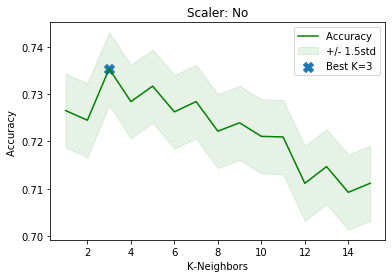

Scaler:  Min Max
The best accuracy was  0.757 with k= 7


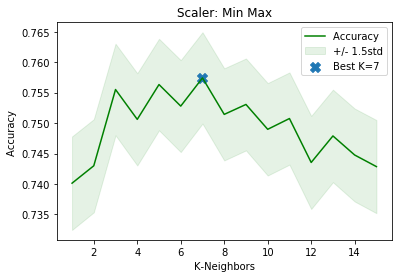

Scaler:  Standard
The best accuracy was  0.754 with k= 3


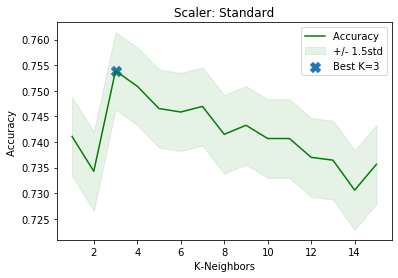

In [16]:
type_scaler=['No','Min Max','Standard']
Knn_Accuracy=[]
Knn_Jaccard=[]
Knn_F1_Score=[]
Knn_Recall=[]
Knn_Precision=[]
Knn_AUC=[]
Knn_K=[]
Knn_Log=[]
Knn_UnAccuracy=[]

for s in type_scaler:

    X_train_scaled, X_test_scaled=scal(s)
    
    K = 15
    mean_acc = np.zeros((K))
    std_acc = np.zeros((K))

    for n in range(1,K+1):

        neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_scaled,y1_train)
        yhat_KNN=neigh.predict(X_test_scaled)

        mean_acc[n-1] = metrics.accuracy_score(y1_test, yhat_KNN)
        std_acc[n-1]=np.std(yhat_KNN==y1_test)/np.sqrt(yhat_KNN.shape[0])
    
    print('============================================================')
    print('Scaler: ',s)
    
    BestKNN=KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(X_train_scaled,y1_train)
    
    print( "The best accuracy was ", round(mean_acc.max(),3), "with k=", mean_acc.argmax()+1) 
    
    y1_pred = BestKNN.predict(X_test_scaled)
            
    #Classification Metrics
    Knn_K.append(mean_acc.argmax()+1)
    Knn_Accuracy.append(round(metrics.accuracy_score(y1_test, y1_pred),4))
    Knn_Precision.append(round(metrics.precision_score(y1_test, y1_pred),4))
    Knn_Recall.append(round(metrics.recall_score(y1_test, y1_pred),4))
    Knn_F1_Score.append(round(metrics.f1_score(y1_test, y1_pred),4))
    Knn_Jaccard.append(round(metrics.jaccard_score(y1_test, y1_pred),4))
    Knn_AUC.append(round(metrics.roc_auc_score(y1_test, y1_pred),4))
    Knn_UnAccuracy.append(round(metrics.balanced_accuracy_score(y1_test, y1_pred),4))

    plt.plot(range(1,K+1),mean_acc,'g')
    plt.fill_between(range(1,K+1),mean_acc - 1.5 * std_acc,mean_acc + 1.5 * std_acc, alpha=0.10,color="g")
    plt.scatter(mean_acc.argmax()+1,mean_acc.max(),s=100,marker="X")
    plt.legend(('Accuracy ', '+/- 1.5std',"Best K="+str(mean_acc.argmax()+1)))
    plt.ylabel('Accuracy ')
    plt.xlabel('K-Neighbors')
    plt.title('Scaler: '+s)
    
    my_file=s+' scaler.png'
    dir2=os.getcwd()+"/Classification Models/KNN" 
    plt.savefig(os.path.join(dir2, my_file))
    
    plt.show()
    


Summary

   Scaler  K  Accuracy  Precision  Recall  F1-Score  Jaccard     AUC
       No  3    0.7354     0.7424  0.6840    0.7120   0.5528  0.7332
  Min Max  7    0.7574     0.7867  0.6761    0.7272   0.5713  0.7540
 Standard  3    0.7539     0.7647  0.7011    0.7315   0.5767  0.7517

Best model k= 7  with  Min Max scaler
Test data: 7346


[('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier(n_neighbors=7))]

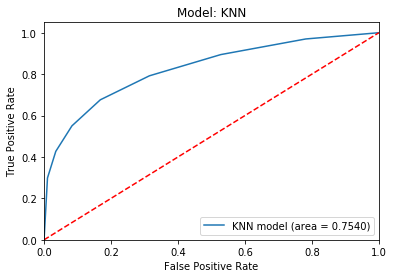

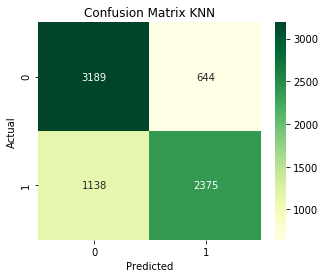

In [17]:
print("Summary\n")

Knn_Report=pd.DataFrame(list(zip(type_scaler,Knn_K,Knn_Accuracy,Knn_Precision,Knn_Recall,Knn_F1_Score,Knn_Jaccard,Knn_AUC))
                    ,columns=['Scaler','K','Accuracy','Precision','Recall','F1-Score','Jaccard','AUC'])

print(Knn_Report.to_string(index=False))

Best_K=Knn_Report[Knn_Report['Accuracy']==np.max(Knn_Report['Accuracy'])].iloc[0,1]
Best_K_scal=Knn_Report[Knn_Report['Accuracy']==np.max(Knn_Report['Accuracy'])].iloc[0,0]

print('\nBest model k=',Best_K,' with ',Best_K_scal,'scaler')

X_train_scaled, X_test_scaled=scal(Best_K_scal)
BestKNN=KNeighborsClassifier(n_neighbors = Best_K).fit(X_train_scaled,y1_train)

y1_pred = BestKNN.predict(X_test_scaled)
y1_prob=BestKNN.predict_proba(X_test_scaled)[:,1]

ROC(y1_test,y1_pred,y1_prob,'KNN')
Confusion(y1_test,y1_pred,'KNN')

#Save best model
clf ['KNN']=[]

if Best_K_scal!='No':
    clf ['KNN'].append(translate_scal(Best_K_scal))

clf ['KNN'].append(('knn',KNeighborsClassifier(n_neighbors = Best_K)))

clf ['KNN']

## Logistic Regression

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [18]:
from sklearn.linear_model import LogisticRegression

Scaler:  No
Penalty:  none
Solver:  newton-cg
The best accuracy was  0.6714 with C= 0.1  with  none  penalty


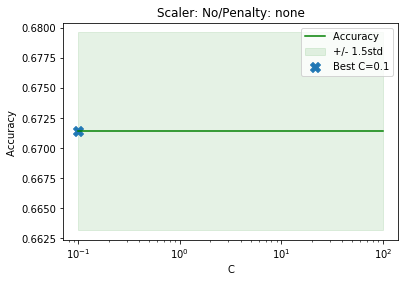

Scaler:  No
Penalty:  l1
Solver:  liblinear
The best accuracy was  0.6717 with C= 10  with  l1  penalty


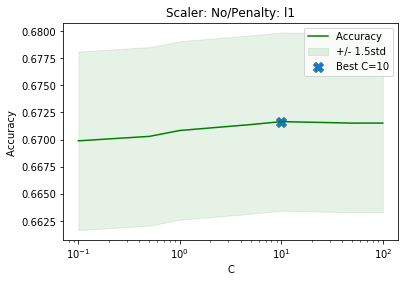

Scaler:  No
Penalty:  l2
Solver:  newton-cg
The best accuracy was  0.6714 with C= 50  with  l2  penalty


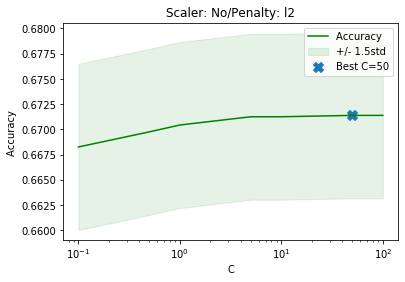

Scaler:  Min Max
Penalty:  none
Solver:  newton-cg
The best accuracy was  0.6714 with C= 0.1  with  none  penalty


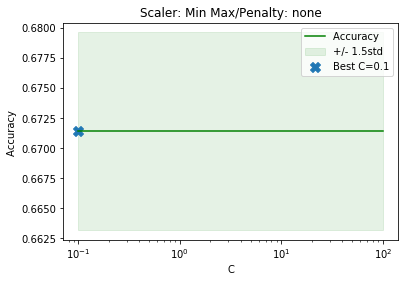

Scaler:  Min Max
Penalty:  l1
Solver:  liblinear
The best accuracy was  0.6714 with C= 50  with  l1  penalty


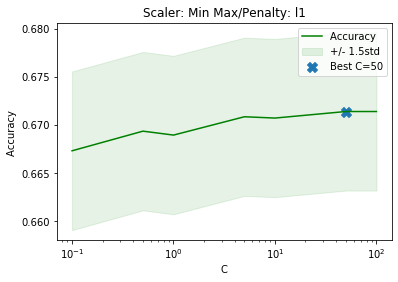

Scaler:  Min Max
Penalty:  l2
Solver:  newton-cg
The best accuracy was  0.6712 with C= 100  with  l2  penalty


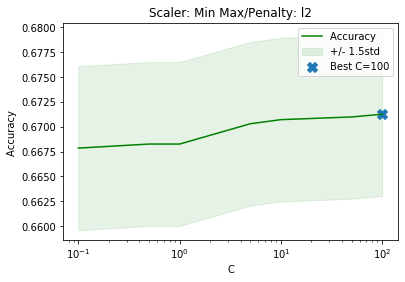

Scaler:  Standard
Penalty:  none
Solver:  newton-cg
The best accuracy was  0.6714 with C= 0.1  with  none  penalty


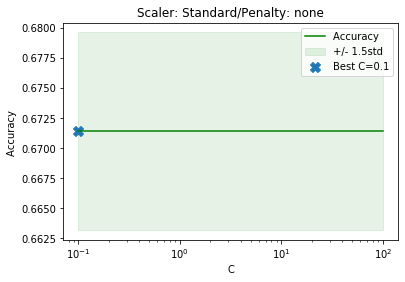

Scaler:  Standard
Penalty:  l1
Solver:  liblinear
The best accuracy was  0.6717 with C= 5  with  l1  penalty


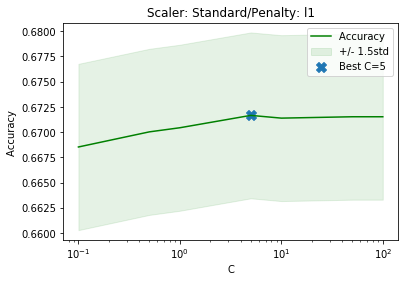

Scaler:  Standard
Penalty:  l2
Solver:  newton-cg
The best accuracy was  0.6715 with C= 5  with  l2  penalty


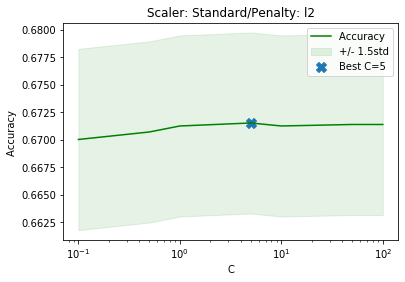

In [19]:
type_scaler=['No','Min Max','Standard']
parameters=[('none','newton-cg'),('l1','liblinear'), ('l2','newton-cg')]
C=[0.1,0.5,1,5,10,50,100]

Log_Accuracy=[]
Log_Jaccard=[]
Log_F1_Score=[]
Log_Recall=[]
Log_Precision=[]
Log_AUC=[]
Log_C=[]
Log_Loss=[]
Log_Type=[]
Log_Solver=[]
Log_Penalty=[]

for s in type_scaler:

    X_train_scaled, X_test_scaled=scal(s)
    
    mean_acc = np.zeros(len(C))
    std_acc = np.zeros(len(C))
    
    for p,sol in parameters:
        for n in range(1,len(C)+1):

            Log = LogisticRegression(penalty=p,C=C[n-1],solver=sol,fit_intercept=True).fit(X_train_scaled,y1_train)
            yhat=Log.predict(X_test_scaled)

            mean_acc[n-1] = metrics.accuracy_score(y1_test, yhat)
            std_acc[n-1]=np.std(yhat==y1_test)/np.sqrt(yhat.shape[0])

        print('============================================================')
        print('Scaler: ',s)
        print('Penalty: ',p)
        print('Solver: ',sol)

        BestLog=LogisticRegression(penalty=p,C=C[mean_acc.argmax()],solver=sol,fit_intercept=True).fit(X_train_scaled,y1_train)

        print( "The best accuracy was ", round(mean_acc.max(),4), "with C=", C[mean_acc.argmax()],' with ',p,' penalty') 

        y1_pred = BestLog.predict(X_test_scaled)
        LR_yhat_prob = BestLog.predict_proba(X_test_scaled)

        #Classification Metrics
        Log_C.append(C[mean_acc.argmax()])
        Log_Type.append(s)
        Log_Solver.append(sol)
        Log_Penalty.append(p)
        Log_Accuracy.append(round(metrics.accuracy_score(y1_test, y1_pred),4))
        Log_Precision.append(round(metrics.precision_score(y1_test, y1_pred),4))
        Log_Recall.append(round(metrics.recall_score(y1_test, y1_pred),4))
        Log_F1_Score.append(round(metrics.f1_score(y1_test, y1_pred),4))
        Log_Jaccard.append(round(metrics.jaccard_score(y1_test, y1_pred),4))
        Log_AUC.append(round(metrics.roc_auc_score(y1_test, y1_pred),4))
        Log_Loss.append(round(metrics.log_loss(y1_test, BestLog.predict_proba(X_test_scaled)),4))

        plt.plot(C,mean_acc,'g')
        plt.fill_between(C,mean_acc - 1.5 * std_acc,mean_acc + 1.5 * std_acc, alpha=0.10,color="g")
        plt.scatter(C[mean_acc.argmax()],mean_acc.max(),s=100,marker="X")
        plt.legend(('Accuracy ', '+/- 1.5std',"Best C="+str(C[mean_acc.argmax()])))
        plt.ylabel('Accuracy ')
        plt.xlabel('C')
        plt.title('Scaler: '+s+'/Penalty: '+p)
        plt.xscale("log")
        
        my_file=s+' scaler with '+p+' penalty.png'
        dir2=os.getcwd()+"/Classification Models/Logistic Regression" 
        plt.savefig(os.path.join(dir2, my_file))

        plt.show()


Summary

   Scaler Penalty     Solver      C  Accuracy  Precision  Recall  F1-Score  Jaccard     AUC  Log Loss
       No    none  newton-cg    0.1    0.6714     0.7628  0.4540    0.5692   0.3979  0.6623    0.5837
       No      l1  liblinear   10.0    0.6717     0.7633  0.4543    0.5696   0.3982  0.6626    0.5837
       No      l2  newton-cg   50.0    0.6714     0.7630  0.4537    0.5691   0.3977  0.6623    0.5837
  Min Max    none  newton-cg    0.1    0.6714     0.7628  0.4540    0.5692   0.3979  0.6623    0.5837
  Min Max      l1  liblinear   50.0    0.6712     0.7627  0.4537    0.5690   0.3976  0.6622    0.5837
  Min Max      l2  newton-cg  100.0    0.6712     0.7624  0.4540    0.5691   0.3978  0.6622    0.5837
 Standard    none  newton-cg    0.1    0.6714     0.7628  0.4540    0.5692   0.3979  0.6623    0.5837
 Standard      l1  liblinear    5.0    0.6715     0.7629  0.4543    0.5695   0.3981  0.6625    0.5837
 Standard      l2  newton-cg    5.0    0.6715     0.7632  0.4540    0.569

[('Logistic Regression',
  LogisticRegression(C=10.0, penalty='l1', solver='liblinear'))]

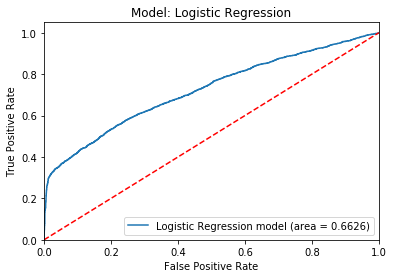

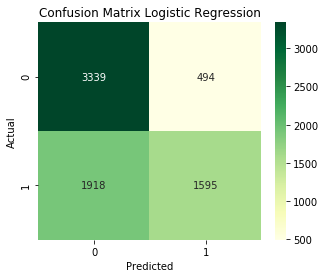

In [20]:
Log_Report=pd.DataFrame(list(zip(Log_Type,Log_Penalty,Log_Solver,Log_C,Log_Accuracy,Log_Precision,Log_Recall,Log_F1_Score,Log_Jaccard,Log_AUC,Log_Loss))
                    ,columns=['Scaler','Penalty','Solver','C','Accuracy','Precision','Recall','F1-Score','Jaccard','AUC','Log Loss'])

print("Summary\n")
print(Log_Report.to_string(index=False))

Best_scal=Log_Report[Log_Report['Accuracy']==np.max(Log_Report['Accuracy'])].iloc[0,0]
Best_Penalty=Log_Report[Log_Report['Accuracy']==np.max(Log_Report['Accuracy'])].iloc[0,1]
Best_solver=Log_Report[Log_Report['Accuracy']==np.max(Log_Report['Accuracy'])].iloc[0,2]
Best_C=Log_Report[Log_Report['Accuracy']==np.max(Log_Report['Accuracy'])].iloc[0,3]

print('\nBest model:\nPenalty:',Best_Penalty,'\nC=',Best_C,'\nScaler',Best_scal)

X_train_scaled, X_test_scaled=scal(Best_scal)
BestLog=LogisticRegression(penalty=Best_Penalty,C=Best_C,solver=Best_solver,fit_intercept=True).fit(X_train_scaled,y1_train)

y1_pred=BestLog.predict(X_test_scaled)
y1_prob=BestLog.predict_proba(X_test_scaled)[:,1]

ROC(y1_test,y1_pred,y1_prob,'Logistic Regression')
Confusion(y1_test,y1_pred,'Logistic Regression')

#Save best model
clf ['Logistic Regression']=[]

if Best_scal!='No':
    clf['Logistic Regression'].append(translate_scal(Best_scal))

clf ['Logistic Regression'].append(('Logistic Regression',LogisticRegression(penalty=Best_Penalty,C=Best_C,solver=Best_solver,fit_intercept=True)))

clf ['Logistic Regression']

# Neural Network

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [21]:
from sklearn.neural_network import MLPClassifier

Scaler:  No
Layer(s):  1
Activation:  logistic
The best accuracy was  0.6536 with  10  nodes and  logistic  activation


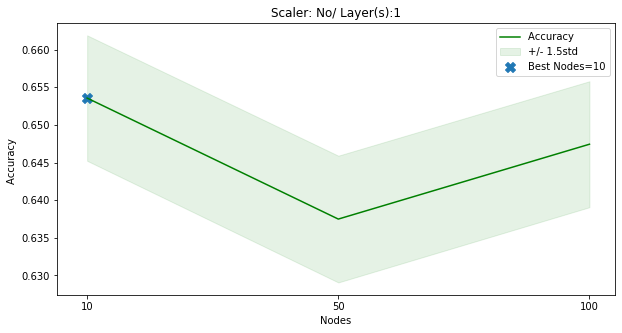

Scaler:  Min Max
Layer(s):  1
Activation:  logistic
The best accuracy was  0.6802 with  10  nodes and  logistic  activation


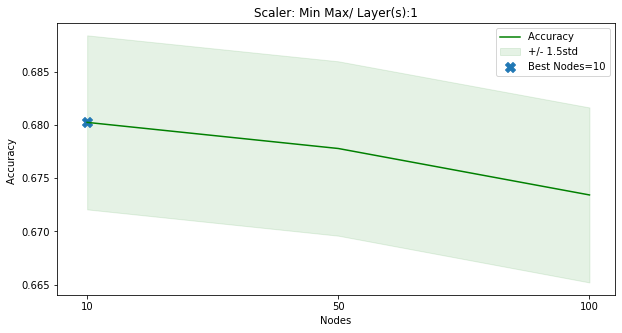

Scaler:  Standard
Layer(s):  1
Activation:  logistic
The best accuracy was  0.7395 with  50  nodes and  logistic  activation


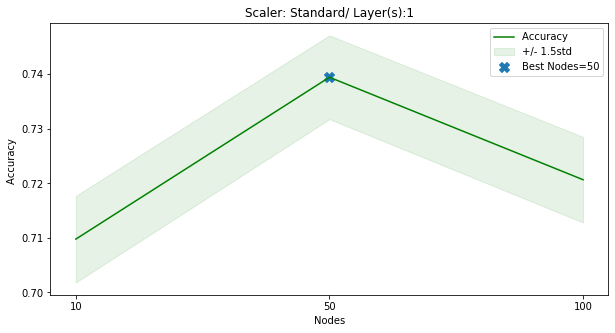

Scaler:  No
Layer(s):  1
Activation:  tanh
The best accuracy was  0.5317 with  100  nodes and  tanh  activation


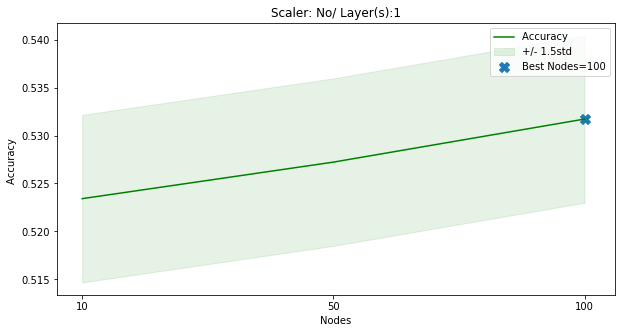

Scaler:  Min Max
Layer(s):  1
Activation:  tanh
The best accuracy was  0.6902 with  10  nodes and  tanh  activation


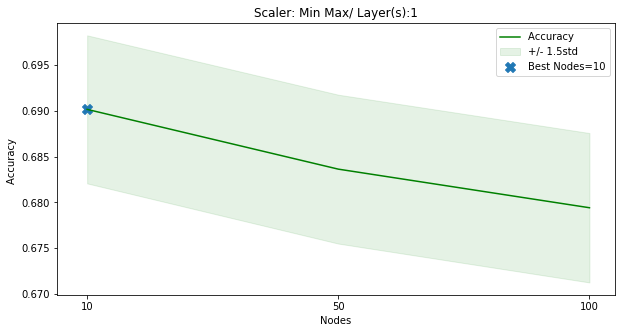

Scaler:  Standard
Layer(s):  1
Activation:  tanh
The best accuracy was  0.762 with  50  nodes and  tanh  activation


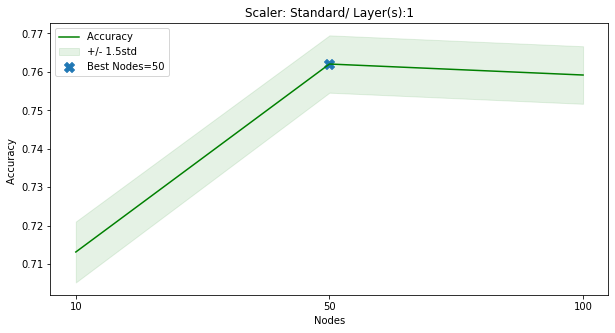

Scaler:  No
Layer(s):  1
Activation:  relu
The best accuracy was  0.5218 with  100  nodes and  relu  activation


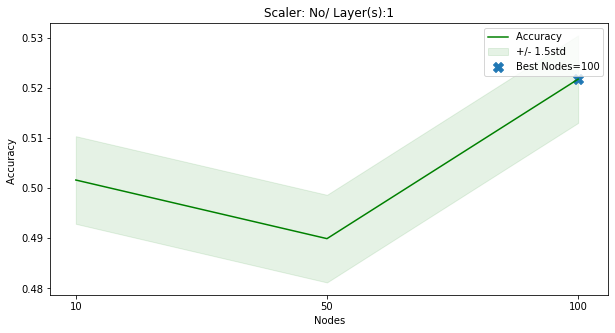

Scaler:  Min Max
Layer(s):  1
Activation:  relu
The best accuracy was  0.6947 with  100  nodes and  relu  activation


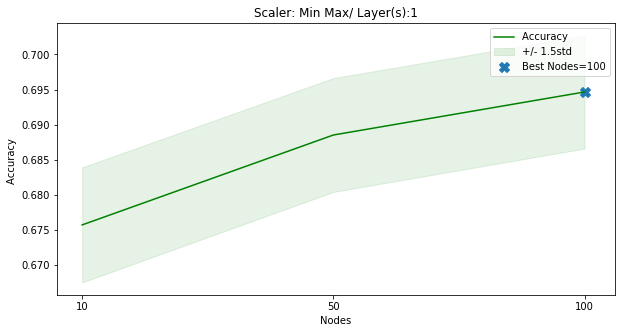

Scaler:  Standard
Layer(s):  1
Activation:  relu
The best accuracy was  0.7573 with  100  nodes and  relu  activation


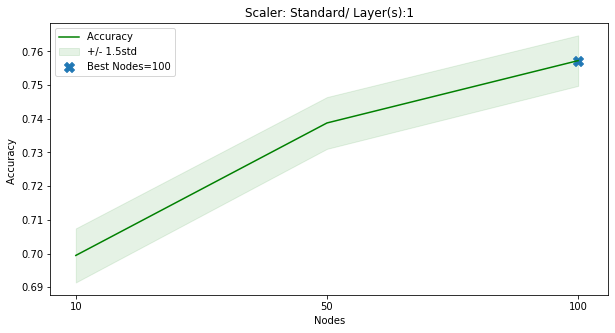

Scaler:  No
Layer(s):  2
Activation:  logistic
The best accuracy was  0.6567 with  (10, 100)  nodes and  logistic  activation


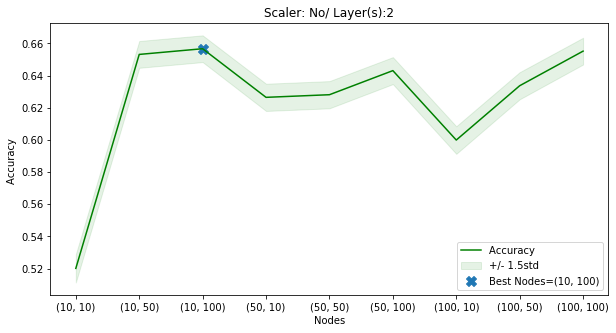

Scaler:  Min Max
Layer(s):  2
Activation:  logistic
The best accuracy was  0.6771 with  (10, 100)  nodes and  logistic  activation


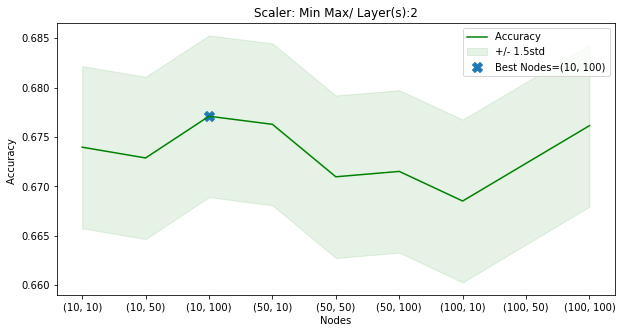

Scaler:  Standard
Layer(s):  2
Activation:  logistic
The best accuracy was  0.7392 with  (50, 10)  nodes and  logistic  activation


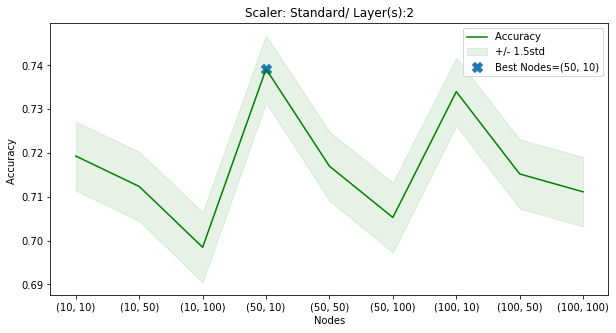

Scaler:  No
Layer(s):  2
Activation:  tanh
The best accuracy was  0.6553 with  (100, 100)  nodes and  tanh  activation


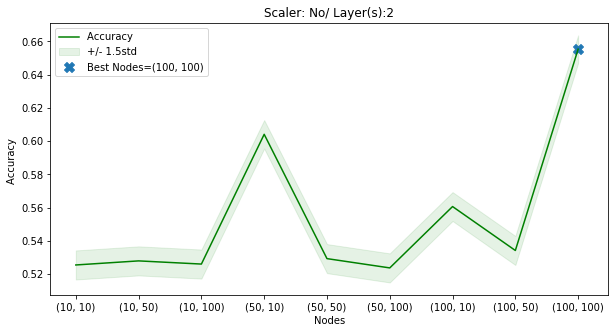

Scaler:  Min Max
Layer(s):  2
Activation:  tanh
The best accuracy was  0.6866 with  (50, 10)  nodes and  tanh  activation


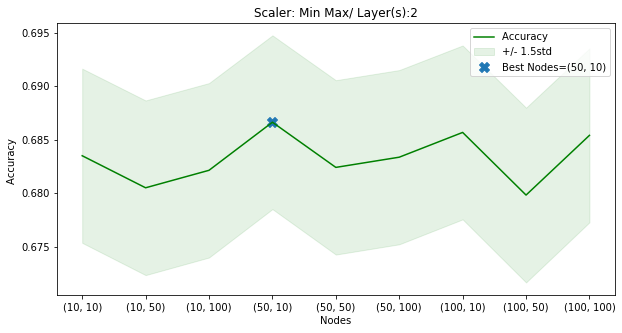

Scaler:  Standard
Layer(s):  2
Activation:  tanh
The best accuracy was  0.7762 with  (100, 50)  nodes and  tanh  activation


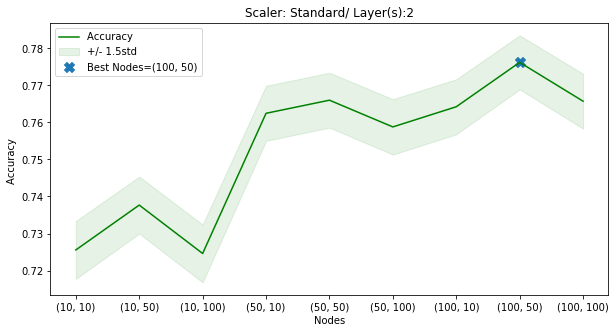

Scaler:  No
Layer(s):  2
Activation:  relu
The best accuracy was  0.6184 with  (50, 100)  nodes and  relu  activation


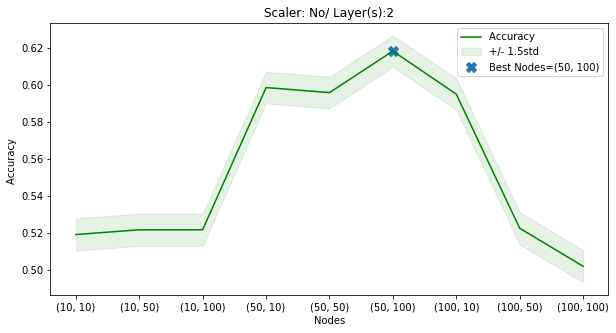

Scaler:  Min Max
Layer(s):  2
Activation:  relu
The best accuracy was  0.6953 with  (100, 100)  nodes and  relu  activation


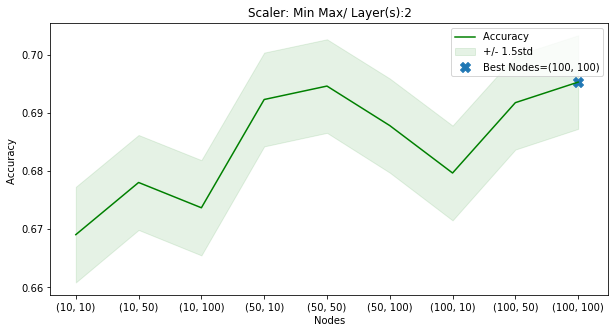

Scaler:  Standard
Layer(s):  2
Activation:  relu
The best accuracy was  0.7714 with  (100, 100)  nodes and  relu  activation


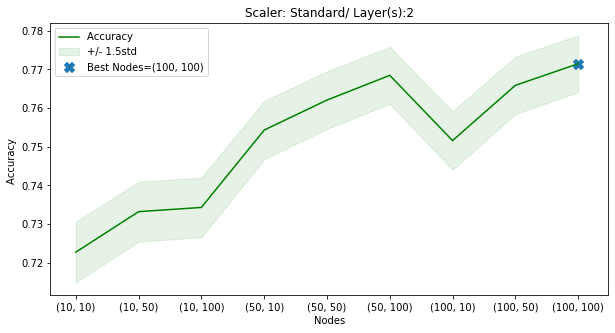

In [22]:
N=[10,50,100]
type_scaler=['No','Min Max','Standard']
Activ=['logistic', 'tanh', 'relu']

NN_Layer=[]
NN_Type=[]
NN_activation=[]
NN_Accuracy=[]
NN_Precision=[]
NN_Recall=[]
NN_F1_Score=[]
NN_Jaccard=[]
NN_AUC=[]
NN_Loss=[]

for layer in range(1,3):
    for act in Activ:
        for s in type_scaler:
            X_train_scaled, X_test_scaled=scal(s)
            mean_acc = np.zeros(len(N)**layer)
            std_acc = np.zeros(len(N)**layer)
            L=[]
            pos=[]
            con=1
            for n in range(1,len(N)+1):
                if layer==1:
                    nnclf = MLPClassifier(hidden_layer_sizes = [N[n-1]], solver='lbfgs'
                                          , activation=act,random_state = 0).fit(X_train_scaled, y1_train)
                    yhat=nnclf.predict(X_test_scaled)
                    con+=1
                    pos.append(con)
                    L.append(N[n-1])
                    mean_acc[n-1]=metrics.accuracy_score(y1_test, yhat)
                    std_acc[n-1]=np.std(yhat==y1_test)/np.sqrt(yhat.shape[0])
                    
                if layer==2:
                    for n2 in range(1,len(N)+1):
                        nnclf = MLPClassifier(hidden_layer_sizes = [N[n-1],N[n2-1]], solver='lbfgs'
                                              , activation=act,random_state = 0).fit(X_train_scaled, y1_train)
                        yhat=nnclf.predict(X_test_scaled)
                        con+=1
                        pos.append(con)
                        L.append((N[n-1],N[n2-1]))
                        mean_acc[(n-1)*len(N)+n2-1]=metrics.accuracy_score(y1_test, yhat)
                        std_acc[(n-1)*len(N)+n2-1]=np.std(yhat==y1_test)/np.sqrt(yhat.shape[0])
                    
                    
            print('===============================================================================================')
            print('Scaler: ',s)
            print('Layer(s): ',layer)
            print('Activation: ',act)

            BestNN=MLPClassifier(hidden_layer_sizes = L[mean_acc.argmax()], solver='lbfgs'
                                          , activation=act,random_state = 0).fit(X_train_scaled, y1_train)
                
            print( "The best accuracy was ", round(mean_acc.max(),4), "with ", L[mean_acc.argmax()]
                      ,' nodes and ',act,' activation') 
                
            y1_pred = BestNN.predict(X_test_scaled)
            NN_yhat_prob = BestNN.predict_proba(X_test_scaled)
                
            #Classification Metrics
            NN_Layer.append(L[mean_acc.argmax()])
            NN_Type.append(s)
            NN_activation.append(act)
            NN_Accuracy.append(round(metrics.accuracy_score(y1_test, y1_pred),4))
            NN_Precision.append(round(metrics.precision_score(y1_test, y1_pred),4))
            NN_Recall.append(round(metrics.recall_score(y1_test, y1_pred),4))
            NN_F1_Score.append(round(metrics.f1_score(y1_test, y1_pred),4))
            NN_Jaccard.append(round(metrics.jaccard_score(y1_test, y1_pred),4))
            NN_AUC.append(round(metrics.roc_auc_score(y1_test, y1_pred),4))
            NN_Loss.append(round(metrics.log_loss(y1_test, BestLog.predict_proba(X_test_scaled)),4))
                
            f, ax = plt.subplots(figsize=(10,5))
                
            plt.plot(pos,mean_acc,'g')
            plt.fill_between(pos,mean_acc - 1.5 * std_acc,mean_acc + 1.5 * std_acc, alpha=0.10,color="g")
            plt.scatter(pos[mean_acc.argmax()],mean_acc.max(),s=100,marker="X")
            plt.legend(('Accuracy ', '+/- 1.5std',"Best Nodes="+str(L[mean_acc.argmax()])))
            plt.ylabel('Accuracy ')
            plt.xlabel('Nodes')
            plt.title('Scaler: '+s+'/ Layer(s):'+str(layer))
            ax.set_xticks(pos)
            ax.set_xticklabels(L)
            
            my_file= s+' scaler with '+act+' activation and '+str(layer)+' Layer.png'
            dir2=os.getcwd()+"/Classification Models/Neural Network" 
            plt.savefig(os.path.join(dir2, my_file))
            plt.show()
                

Summary

      Nodes    Scaler Activation  Accuracy  Precision  Recall  F1-Score  Jaccard     AUC
         10        No   logistic    0.6536     0.9416  0.2938    0.4478   0.2885  0.6385
         10   Min Max   logistic    0.6802     0.7694  0.4731    0.5859   0.4144  0.6716
         50  Standard   logistic    0.7395     0.7717  0.6465    0.7035   0.5427  0.7356
        100        No       tanh    0.5317     0.5538  0.1070    0.1794   0.0985  0.5140
         10   Min Max       tanh    0.6902     0.7782  0.4925    0.6032   0.4319  0.6819
         50  Standard       tanh    0.7620     0.7824  0.6960    0.7367   0.5831  0.7593
        100        No       relu    0.5218     0.0000  0.0000    0.0000   0.0000  0.5000
        100   Min Max       relu    0.6947     0.7594  0.5292    0.6237   0.4532  0.6878
        100  Standard       relu    0.7573     0.7853  0.6778    0.7276   0.5718  0.7540
  (10, 100)        No   logistic    0.6567     0.9476  0.2986    0.4541   0.2938  0.6417
  (10, 100) 

[('scaler', StandardScaler()),
 ('NN',
  MLPClassifier(activation='tanh', hidden_layer_sizes=[100, 50], random_state=0,
                solver='lbfgs'))]

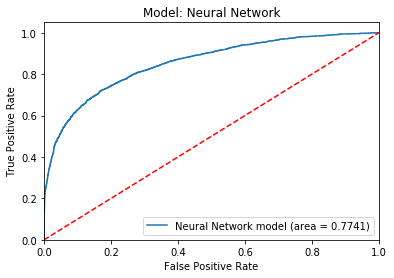

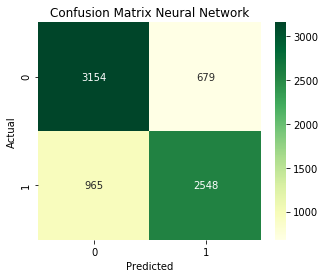

In [23]:
NN_Report=pd.DataFrame(list(zip(NN_Layer,NN_Type,NN_activation,NN_Accuracy,NN_Precision,NN_Recall,NN_F1_Score,NN_Jaccard,NN_AUC))
                    ,columns=['Nodes','Scaler','Activation','Accuracy','Precision','Recall','F1-Score','Jaccard','AUC'])

print("Summary\n")
print(NN_Report.to_string(index=False))

Best_layer=NN_Report[NN_Report['Accuracy']==np.max(NN_Report['Accuracy'])].iloc[0,0]
Best_scal=NN_Report[NN_Report['Accuracy']==np.max(NN_Report['Accuracy'])].iloc[0,1]
Best_act=NN_Report[NN_Report['Accuracy']==np.max(NN_Report['Accuracy'])].iloc[0,2]

print('\nBest model:\nLayer(s):',len(Best_layer),'\nNodes:',Best_layer,'\nActivation:',Best_act,'\nScaler:',Best_scal)

X_train_scaled, X_test_scaled=scal(Best_scal)

#Best_layer[0],Best_layer[1]
if len(Best_layer)==2:
    BestNN = MLPClassifier(hidden_layer_sizes = [Best_layer[0],Best_layer[1]], solver='lbfgs', activation=Best_act,random_state = 0).fit(X_train_scaled, y1_train)
    Best= MLPClassifier(hidden_layer_sizes = [Best_layer[0],Best_layer[1]], solver='lbfgs', activation=Best_act,random_state = 0)
else:
    BestNN = MLPClassifier(hidden_layer_sizes = [Best_layer], solver='lbfgs', activation=Best_act,random_state = 0).fit(X_train_scaled, y1_train)
    Best = MLPClassifier(hidden_layer_sizes = [Best_layer], solver='lbfgs', activation=Best_act,random_state = 0)
    
y1_pred=BestNN.predict(X_test_scaled)
y1_prob=BestNN.predict_proba(X_test_scaled)[:,1]

ROC(y1_test,y1_pred,y1_prob,'Neural Network')
Confusion(y1_test,y1_pred,'Neural Network')

#Save best model
clf ['Neural Network']=[]

if Best_scal!='No':
    clf['Neural Network'].append(translate_scal(Best_scal))

clf ['Neural Network'].append(('NN',Best))

clf ['Neural Network']



## Decision Tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [24]:
from sklearn import tree

Scaler:  No
The best accuracy was  0.742 with a depth of 18


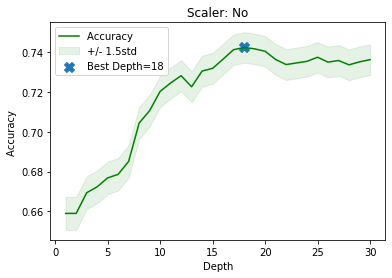

Scaler:  Min Max
The best accuracy was  0.744 with a depth of 17


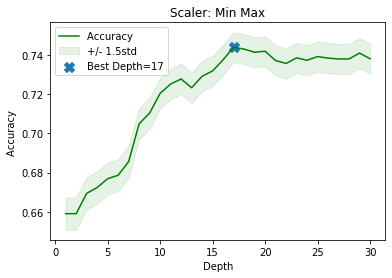

Scaler:  Standard
The best accuracy was  0.742 with a depth of 18


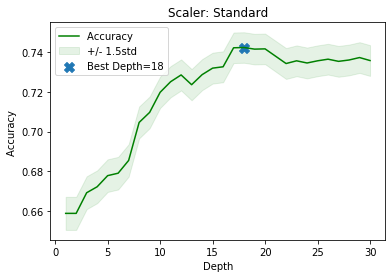

In [25]:
K=30 #Max Depth

type_scaler=['No','Min Max','Standard']

Tree_Accuracy=[]
Tree_Jaccard=[]
Tree_F1_Score=[]
Tree_Recall=[]
Tree_Precision=[]
Tree_AUC=[]
Tree_K=[]
Tree_Log=[]

for s in type_scaler:

    X_train_scaled, X_test_scaled=scal(s)

    mean_acc = np.zeros((K))
    std_acc = np.zeros((K))

    for n in range(1,K+1):
        
        treeclf = tree.DecisionTreeClassifier(max_depth = n).fit(X_train_scaled,y1_train)
        yhat_tree=treeclf.predict(X_test_scaled)

        mean_acc[n-1] = metrics.accuracy_score(y1_test, yhat_tree)
        std_acc[n-1]=np.std(yhat_tree==y1_test)/np.sqrt(yhat_tree.shape[0])
    
    print('============================================================')
    print('Scaler: ',s)
    
    
    Best_tree = tree.DecisionTreeClassifier(max_depth = mean_acc.argmax()+1).fit(X_train_scaled,y1_train)
    
    print( "The best accuracy was ", round(mean_acc.max(),3), "with a depth of", mean_acc.argmax()+1) 
    
    y1_pred = Best_tree.predict(X_test_scaled)
            
    #Classification Metrics
    Tree_K.append(mean_acc.argmax()+1)
    Tree_Accuracy.append(round(metrics.accuracy_score(y1_test, y1_pred),4))
    Tree_Precision.append(round(metrics.precision_score(y1_test, y1_pred),4))
    Tree_Recall.append(round(metrics.recall_score(y1_test, y1_pred),4))
    Tree_F1_Score.append(round(metrics.f1_score(y1_test, y1_pred),4))
    Tree_Jaccard.append(round(metrics.jaccard_score(y1_test, y1_pred),4))
    Tree_AUC.append(round(metrics.roc_auc_score(y1_test, y1_pred),4))

    plt.plot(range(1,K+1),mean_acc,'g')
    plt.fill_between(range(1,K+1),mean_acc - 1.5 * std_acc,mean_acc + 1.5 * std_acc, alpha=0.10,color="g")
    plt.scatter(mean_acc.argmax()+1,mean_acc.max(),s=100,marker="X")
    plt.legend(('Accuracy ', '+/- 1.5std',"Best Depth="+str(mean_acc.argmax()+1)))
    plt.ylabel('Accuracy ')
    plt.xlabel('Depth')
    plt.title('Scaler: '+s)
    
    my_file=s+' scaler.png'
    dir2=os.getcwd()+"/Classification Models/Decision Tree" 
    plt.savefig(os.path.join(dir2, my_file))
    
    plt.show()

Summary

   Scaler  Depth  Accuracy  Precision  Recall  F1-Score  Jaccard     AUC
       No     18    0.7416     0.7540  0.6823    0.7164   0.5581  0.7392
  Min Max     17    0.7430     0.7661  0.6658    0.7125   0.5533  0.7398
 Standard     18    0.7422     0.7540  0.6840    0.7173   0.5592  0.7397

Best model with a depth 17  with  Min Max scaler
Test data: 7346


[('scaler', MinMaxScaler()), ('Tree', DecisionTreeClassifier(max_depth=17))]

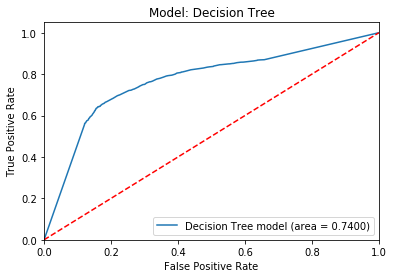

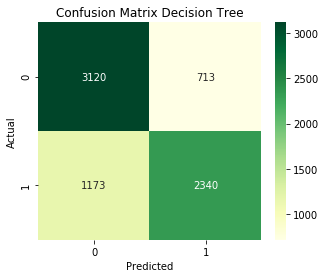

In [26]:
print("Summary\n")

Tree_Report=pd.DataFrame(list(zip(type_scaler,Tree_K,Tree_Accuracy,Tree_Precision,Tree_Recall,Tree_F1_Score,Tree_Jaccard,Tree_AUC))
                    ,columns=['Scaler','Depth','Accuracy','Precision','Recall','F1-Score','Jaccard','AUC'])

print(Tree_Report.to_string(index=False))

Best_Depth=Tree_Report[Tree_Report['Accuracy']==np.max(Tree_Report['Accuracy'])].iloc[0,1]
Best_Tree_scal=Tree_Report[Tree_Report['Accuracy']==np.max(Tree_Report['Accuracy'])].iloc[0,0]

print('\nBest model with a depth',Best_Depth,' with ',Best_Tree_scal,'scaler')

X_train_scaled, X_test_scaled=scal(Best_Tree_scal)

Best_tree = tree.DecisionTreeClassifier(max_depth = Best_Depth).fit(X_train_scaled,y1_train)

y1_pred = Best_tree.predict(X_test_scaled)
y1_prob=Best_tree.predict_proba(X_test_scaled)[:,1]

ROC(y1_test,y1_pred,y1_prob,'Decision Tree')
Confusion(y1_test,y1_pred,'Decision Tree')

#Save best model
clf ['Decision Tree']=[]

if Best_Tree_scal!='No':
    clf['Decision Tree'].append(translate_scal(Best_Tree_scal))

clf ['Decision Tree'].append(('Tree',tree.DecisionTreeClassifier(max_depth = Best_Depth)))

clf ['Decision Tree']

## Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [27]:
from sklearn.ensemble import RandomForestClassifier

Scaler:  No
Criterion: gini
The best accuracy was  0.801 with a depth of 20


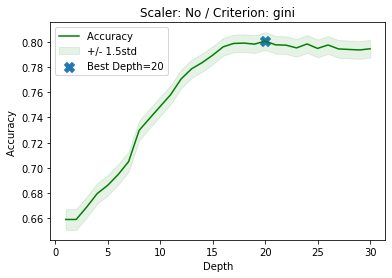

Scaler:  No
Criterion: entropy
The best accuracy was  0.804 with a depth of 21


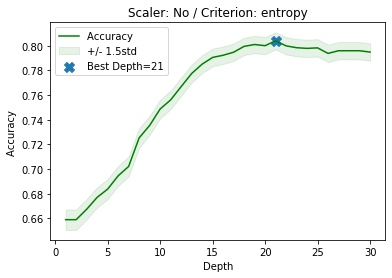

Scaler:  Min Max
Criterion: gini
The best accuracy was  0.801 with a depth of 20


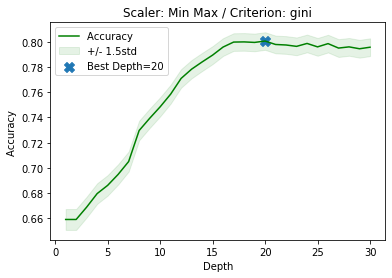

Scaler:  Min Max
Criterion: entropy
The best accuracy was  0.804 with a depth of 21


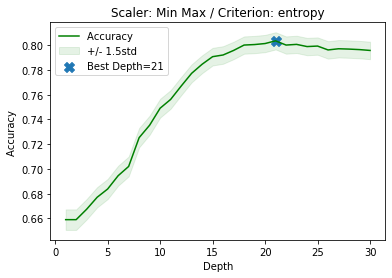

Scaler:  Standard
Criterion: gini
The best accuracy was  0.801 with a depth of 20


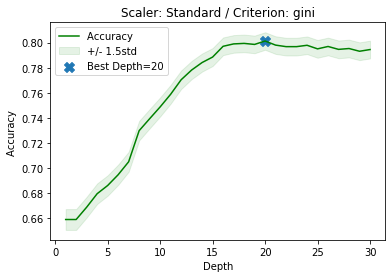

Scaler:  Standard
Criterion: entropy
The best accuracy was  0.804 with a depth of 21


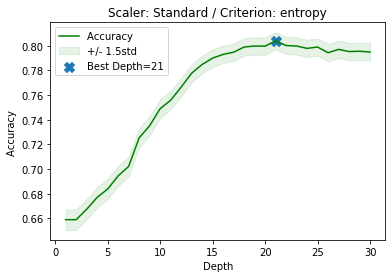

In [28]:

K=30 #Max Depth
criterion=["gini","entropy"]
type_scaler=['No','Min Max','Standard']

Forest_Accuracy=[]
Forest_Jaccard=[]
Forest_F1_Score=[]
Forest_Recall=[]
Forest_Precision=[]
Forest_AUC=[]
Forest_K=[]
Forest_Criterion=[]

for s in type_scaler:
    for c in criterion:
        X_train_scaled, X_test_scaled=scal(s)

        mean_acc = np.zeros((K))
        std_acc = np.zeros((K))

        for n in range(1,K+1):

            Forest = RandomForestClassifier(max_depth = n, random_state=0,criterion=c).fit(X_train_scaled,y1_train)
            yhat_tree=Forest.predict(X_test_scaled)

            mean_acc[n-1] = metrics.accuracy_score(y1_test, yhat_tree)
            std_acc[n-1]=np.std(yhat_tree==y1_test)/np.sqrt(yhat_tree.shape[0])

        print('============================================================')
        print('Scaler: ',s)
        print('Criterion:',c)

        Best_Forest = RandomForestClassifier(max_depth = mean_acc.argmax()+1,random_state=0,criterion=c).fit(X_train_scaled,y1_train)

        print( "The best accuracy was ", round(mean_acc.max(),3), "with a depth of", mean_acc.argmax()+1) 

        y1_pred = Best_Forest.predict(X_test_scaled)

        #Classification Metrics
        Forest_K.append(mean_acc.argmax()+1)
        Forest_Criterion.append(c)
        Forest_Accuracy.append(round(metrics.accuracy_score(y1_test, y1_pred),4))
        Forest_Precision.append(round(metrics.precision_score(y1_test, y1_pred),4))
        Forest_Recall.append(round(metrics.recall_score(y1_test, y1_pred),4))
        Forest_F1_Score.append(round(metrics.f1_score(y1_test, y1_pred),4))
        Forest_Jaccard.append(round(metrics.jaccard_score(y1_test, y1_pred),4))
        Forest_AUC.append(round(metrics.roc_auc_score(y1_test, y1_pred),4))

        plt.plot(range(1,K+1),mean_acc,'g')
        plt.fill_between(range(1,K+1),mean_acc - 1.5 * std_acc,mean_acc + 1.5 * std_acc, alpha=0.10,color="g")
        plt.scatter(mean_acc.argmax()+1,mean_acc.max(),s=100,marker="X")
        plt.legend(('Accuracy ', '+/- 1.5std',"Best Depth="+str(mean_acc.argmax()+1)))
        plt.ylabel('Accuracy ')
        plt.xlabel('Depth')
        plt.title('Scaler: '+s+" / Criterion: "+c)

        my_file=s+' scaler with '+c+' criterion.png'
        dir2=os.getcwd()+"/Classification Models/Random Forest" 
        plt.savefig(os.path.join(dir2, my_file))
        plt.show()

Summary

   Scaler  Depth Criterion  Accuracy  Precision  Recall  F1-Score  Jaccard     AUC
       No     20      gini    0.8007     0.8229  0.7432    0.7810   0.6407  0.7983
  Min Max     21   entropy    0.8040     0.8248  0.7492    0.7852   0.6464  0.8017
 Standard     20      gini    0.8007     0.8223  0.7441    0.7812   0.6410  0.7983

Best model with a depth 21  with  Min Max scaler using entropy as criterion
Test data: 7346


[('scaler', MinMaxScaler()),
 ('Random Forest',
  RandomForestClassifier(criterion='entropy', max_depth=21, random_state=0))]

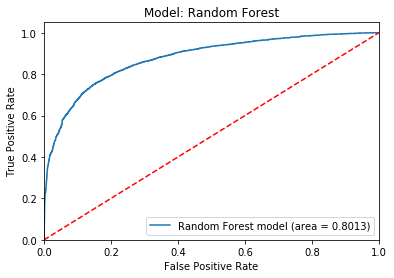

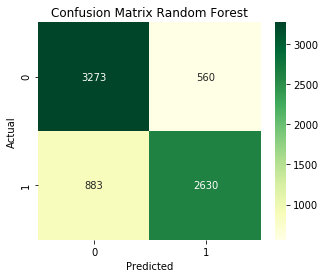

In [29]:
print("Summary\n")

Forest_Report=pd.DataFrame(list(zip(type_scaler,Forest_K,Forest_Criterion,Forest_Accuracy,Forest_Precision,Forest_Recall,Forest_F1_Score,Forest_Jaccard,Forest_AUC))
                    ,columns=['Scaler','Depth','Criterion','Accuracy','Precision','Recall','F1-Score','Jaccard','AUC'])

print(Forest_Report.to_string(index=False))

Best_Forest_scal=Forest_Report[Forest_Report['Accuracy']==np.max(Forest_Report['Accuracy'])].iloc[0,0]
Best_Forest_Depth=Forest_Report[Forest_Report['Accuracy']==np.max(Forest_Report['Accuracy'])].iloc[0,1]
Best_Forest_Criterion=Forest_Report[Forest_Report['Accuracy']==np.max(Forest_Report['Accuracy'])].iloc[0,2]

print('\nBest model with a depth',Best_Forest_Depth,' with ',Best_Forest_scal,'scaler using',Best_Forest_Criterion,'as criterion')

X_train_scaled, X_test_scaled=scal(Best_Forest_scal)

Best_Forest = RandomForestClassifier(max_depth =Best_Forest_Depth ,random_state=0,criterion=Best_Forest_Criterion).fit(X_train_scaled,y1_train)

y1_pred = Best_Forest.predict(X_test_scaled)
y1_prob = Best_Forest.predict_proba(X_test_scaled)[:,1]

ROC(y1_test,y1_pred,y1_prob,'Random Forest')
Confusion(y1_test,y1_pred,'Random Forest')

#Save best model
clf ['Random Forest']=[]

if Best_Forest_scal!='No':
    clf['Random Forest'].append(translate_scal(Best_Forest_scal))

clf ['Random Forest'].append(('Random Forest',RandomForestClassifier(max_depth=Best_Forest_Depth ,random_state=0,criterion=Best_Forest_Criterion)))

clf ['Random Forest']

## Gradient Boosting Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

Scaler:  No
The best accuracy was  0.803 with a depth of 10


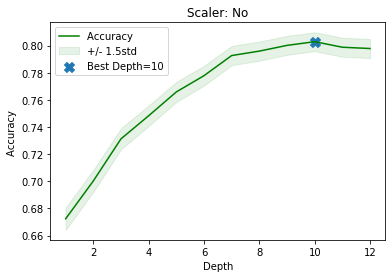

Scaler:  Min Max
The best accuracy was  0.804 with a depth of 10


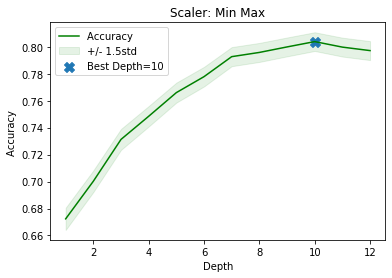

Scaler:  Standard
The best accuracy was  0.804 with a depth of 10


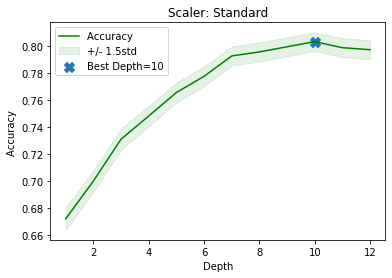

In [31]:
K=12 #Max Depth
type_scaler=['No','Min Max','Standard']

Gradient_Accuracy=[]
Gradient_Jaccard=[]
Gradient_F1_Score=[]
Gradient_Recall=[]
Gradient_Precision=[]
Gradient_AUC=[]
Gradient_K=[]
Gradient_Criterion=[]

for s in type_scaler:

    X_train_scaled, X_test_scaled=scal(s)

    mean_acc = np.zeros((K))
    std_acc = np.zeros((K))

    for n in range(1,K+1):

        Gradient = GradientBoostingClassifier(max_depth = n, random_state=0).fit(X_train_scaled,y1_train)
        yhat_tree=Gradient.predict(X_test_scaled)

        mean_acc[n-1] = metrics.accuracy_score(y1_test, yhat_tree)
        std_acc[n-1]=np.std(yhat_tree==y1_test)/np.sqrt(yhat_tree.shape[0])

    print('============================================================')
    print('Scaler: ',s)

    Best_Gradient = GradientBoostingClassifier(max_depth = n, random_state=0).fit(X_train_scaled,y1_train)

    print( "The best accuracy was ", round(mean_acc.max(),3), "with a depth of", mean_acc.argmax()+1) 

    y1_pred = Best_Gradient.predict(X_test_scaled)

    #Classification Metrics
    Gradient_K.append(mean_acc.argmax()+1)
    Gradient_Accuracy.append(round(metrics.accuracy_score(y1_test, y1_pred),4))
    Gradient_Precision.append(round(metrics.precision_score(y1_test, y1_pred),4))
    Gradient_Recall.append(round(metrics.recall_score(y1_test, y1_pred),4))
    Gradient_F1_Score.append(round(metrics.f1_score(y1_test, y1_pred),4))
    Gradient_Jaccard.append(round(metrics.jaccard_score(y1_test, y1_pred),4))
    Gradient_AUC.append(round(metrics.roc_auc_score(y1_test, y1_pred),4))

    plt.plot(range(1,K+1),mean_acc,'g')
    plt.fill_between(range(1,K+1),mean_acc - 1.5 * std_acc,mean_acc + 1.5 * std_acc, alpha=0.10,color="g")
    plt.scatter(mean_acc.argmax()+1,mean_acc.max(),s=100,marker="X")
    plt.legend(('Accuracy ', '+/- 1.5std',"Best Depth="+str(mean_acc.argmax()+1)))
    plt.ylabel('Accuracy ')
    plt.xlabel('Depth')
    plt.title('Scaler: '+s)
    
    my_file=s+' scaler.png'
    dir2=os.getcwd()+"/Classification Models/Gradient Boosting" 
    plt.savefig(os.path.join(dir2, my_file))
    
    plt.show()



Summary

   Scaler  Depth  Accuracy  Precision  Recall  F1-Score  Jaccard     AUC
       No     10    0.7978     0.8056  0.7609    0.7826   0.6429  0.7963
  Min Max     10    0.7972     0.8046  0.7606    0.7820   0.6420  0.7956
 Standard     10    0.7976     0.8049  0.7612    0.7824   0.6426  0.7961

Best model with a depth 10  with  No scaler
Test data: 7346


[('Gradient Boosting',
  GradientBoostingClassifier(max_depth=10, random_state=0))]

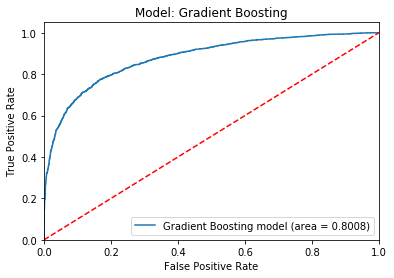

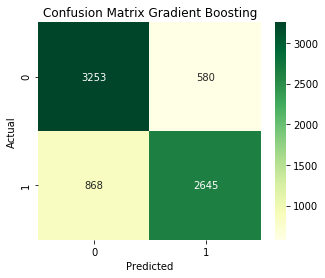

In [32]:
print("Summary\n")

Gradient_Report=pd.DataFrame(list(zip(type_scaler,Gradient_K,Gradient_Accuracy,Gradient_Precision,Gradient_Recall,Gradient_F1_Score,Gradient_Jaccard,Gradient_AUC))
                    ,columns=['Scaler','Depth','Accuracy','Precision','Recall','F1-Score','Jaccard','AUC'])

print(Gradient_Report.to_string(index=False))

Best_Gradient_scal=Gradient_Report[Gradient_Report['Accuracy']==np.max(Gradient_Report['Accuracy'])].iloc[0,0]
Best_Gradient_Depth=Gradient_Report[Gradient_Report['Accuracy']==np.max(Gradient_Report['Accuracy'])].iloc[0,1]


print('\nBest model with a depth',Best_Gradient_Depth,' with ',Best_Gradient_scal,'scaler')

X_train_scaled, X_test_scaled=scal(Best_Gradient_scal)

Best_Gradient = GradientBoostingClassifier(max_depth =Best_Gradient_Depth, random_state=0).fit(X_train_scaled,y1_train)

y1_pred = Best_Gradient.predict(X_test_scaled)
y1_prob = Best_Gradient.predict_proba(X_test_scaled)[:,1]

ROC(y1_test,y1_pred,y1_prob,'Gradient Boosting')
Confusion(y1_test,y1_pred,'Gradient Boosting')

#Save best model
clf ['Gradient Boosting']=[]

if Best_Gradient_scal!='No':
    clf['Gradient Boosting'].append(translate_scal(Best_Gradient_scal))

clf ['Gradient Boosting'].append(('Gradient Boosting',GradientBoostingClassifier(max_depth =Best_Gradient_Depth, random_state=0)))

clf ['Gradient Boosting']


## Support Vector Machine

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [33]:
from sklearn.svm import LinearSVC

Scaler:  No
Penalty:  l2
The best accuracy was  0.6225 with C= 0.1  with  l2  penalty


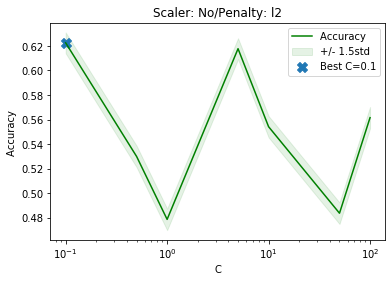

Scaler:  Min Max
Penalty:  l2
The best accuracy was  0.6706 with C= 10  with  l2  penalty


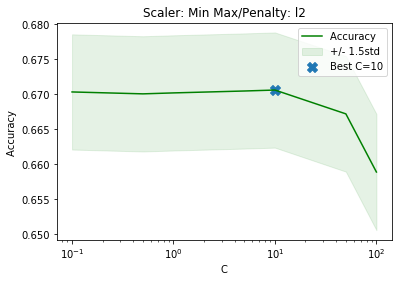

Scaler:  Standard
Penalty:  l2
The best accuracy was  0.6704 with C= 0.1  with  l2  penalty


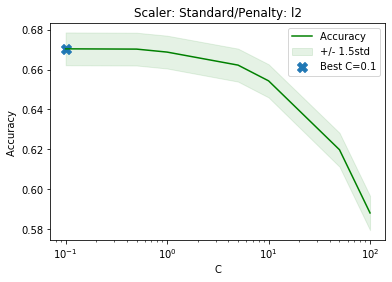

In [34]:
type_scaler=['No','Min Max','Standard']
penalty=['l2']
C=[0.1,0.5,1,5,10,50,100]

SVM_Accuracy=[]
SVM_Jaccard=[]
SVM_F1_Score=[]
SVM_Recall=[]
SVM_Precision=[]
SVM_AUC=[]
SVM_C=[]
SVM_Type=[]
SVM_Penalty=[]

for s in type_scaler:

    X_train_scaled, X_test_scaled=scal(s)
    
    mean_acc = np.zeros(len(C))
    std_acc = np.zeros(len(C))
    
    for p in penalty:
        for n in range(1,len(C)+1):

            SVM = LinearSVC(penalty=p,C=C[n-1],fit_intercept=True).fit(X_train_scaled,y1_train)
            
            yhat = SVM.predict(X_test_scaled)

            mean_acc[n-1] = metrics.accuracy_score(y1_test, yhat)
            std_acc[n-1]=np.std(yhat==y1_test)/np.sqrt(yhat.shape[0])

        print('============================================================')
        print('Scaler: ',s)
        print('Penalty: ',p)

        Bestsvm=LinearSVC(penalty=p,C=C[mean_acc.argmax()],fit_intercept=True).fit(X_train_scaled,y1_train)
        
        print( "The best accuracy was ", round(mean_acc.max(),4), "with C=", C[mean_acc.argmax()],' with ',p,' penalty') 

        y1_pred = Bestsvm.predict(X_test_scaled)

        #Classification Metrics
        SVM_C.append(C[mean_acc.argmax()])
        SVM_Type.append(s)
        SVM_Penalty.append(p)
        SVM_Accuracy.append(round(metrics.accuracy_score(y1_test, y1_pred),4))
        SVM_Precision.append(round(metrics.precision_score(y1_test, y1_pred),4))
        SVM_Recall.append(round(metrics.recall_score(y1_test, y1_pred),4))
        SVM_F1_Score.append(round(metrics.f1_score(y1_test, y1_pred),4))
        SVM_Jaccard.append(round(metrics.jaccard_score(y1_test, y1_pred),4))
        SVM_AUC.append(round(metrics.roc_auc_score(y1_test, y1_pred),4))

        plt.plot(C,mean_acc,'g')
        plt.fill_between(C,mean_acc - 1.5 * std_acc,mean_acc + 1.5 * std_acc, alpha=0.10,color="g")
        plt.scatter(C[mean_acc.argmax()],mean_acc.max(),s=100,marker="X")
        plt.legend(('Accuracy ', '+/- 1.5std',"Best C="+str(C[mean_acc.argmax()])))
        plt.ylabel('Accuracy ')
        plt.xlabel('C')
        plt.title('Scaler: '+s+'/Penalty: '+p)
        plt.xscale("log")
        
        my_file=s+' scaler with '+p+' penalty.png'
        dir2=os.getcwd()+"/Classification Models/SVM" 
        plt.savefig(os.path.join(dir2, my_file))
        plt.show()

Summary

   Scaler Penalty     C  Accuracy  Precision  Recall  F1-Score  Jaccard     AUC
       No      l2   0.1    0.6093     0.9680  0.1893    0.3167   0.1881  0.5918
  Min Max      l2  10.0    0.6704     0.7886  0.4247    0.5521   0.3813  0.6602
 Standard      l2   0.1    0.6704     0.7886  0.4247    0.5521   0.3813  0.6602

Best model with C= 10.0 , penalty l2 penalty and Min Max scaler
Test data: 7346


[('scaler', MinMaxScaler()), ('SVM', LinearSVC(C=10.0))]

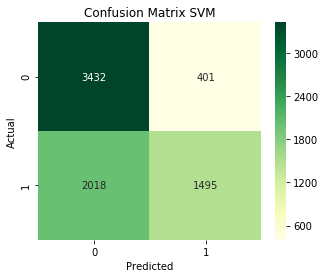

In [35]:
print("Summary\n")

SVM_Report=pd.DataFrame(list(zip(type_scaler,SVM_Penalty,SVM_C,SVM_Accuracy,SVM_Precision,SVM_Recall,SVM_F1_Score,SVM_Jaccard,SVM_AUC))
                    ,columns=['Scaler','Penalty','C','Accuracy','Precision','Recall','F1-Score','Jaccard','AUC'])

print(SVM_Report.to_string(index=False))

Best_SVM_scal=SVM_Report[SVM_Report['Accuracy']==np.max(SVM_Report['Accuracy'])].iloc[0,0]
Best_SVM_C=SVM_Report[SVM_Report['Accuracy']==np.max(SVM_Report['Accuracy'])].iloc[0,2]


print("\nBest model with C=", Best_SVM_C,', penalty l2 penalty and',Best_SVM_scal,'scaler') 


X_train_scaled, X_test_scaled=scal(Best_SVM_scal)

Best_SVM = LinearSVC(penalty='l2',C=Best_SVM_C,fit_intercept=True).fit(X_train_scaled,y1_train)

y1_pred = Best_SVM.predict(X_test_scaled)

Confusion(y1_test,y1_pred,'SVM')

#y1_prob = Best_SVM.predict_proba(X_test_scaled)[:,1]

#ROC(y1_test,y1_pred,y1_prob,'SVM')

#Save best model
clf ['SVM']=[]

if Best_SVM_scal!='No':
    clf['SVM'].append(translate_scal(Best_SVM_scal))

clf ['SVM'].append(('SVM',LinearSVC(penalty='l2',C=Best_SVM_C,fit_intercept=True)))

clf ['SVM']


## Best Classifiers + Cross Validation

Pipelines: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

Cross Validation: https://scikit-learn.org/stable/modules/cross_validation.html

Scoring Parameter: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [36]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,jaccard_score,roc_auc_score

In [37]:
clf

{'KNN': [('scaler', MinMaxScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=7))],
 'Logistic Regression': [('Logistic Regression',
   LogisticRegression(C=10.0, penalty='l1', solver='liblinear'))],
 'Neural Network': [('scaler', StandardScaler()),
  ('NN',
   MLPClassifier(activation='tanh', hidden_layer_sizes=[100, 50], random_state=0,
                 solver='lbfgs'))],
 'Decision Tree': [('scaler', MinMaxScaler()),
  ('Tree', DecisionTreeClassifier(max_depth=17))],
 'Random Forest': [('scaler', MinMaxScaler()),
  ('Random Forest',
   RandomForestClassifier(criterion='entropy', max_depth=21, random_state=0))],
 'Gradient Boosting': [('Gradient Boosting',
   GradientBoostingClassifier(max_depth=10, random_state=0))],
 'SVM': [('scaler', MinMaxScaler()), ('SVM', LinearSVC(C=10.0))]}

In [38]:
cv_models=pd.DataFrame({'Model' : [],'Accuracy':[],'Precision' : [],'Recall':[],'F1' : [],'Jaccard':[],'AUC':[],'Fit Time':[],'Score Time':[],'Total Time':[]})

scoring = ['accuracy','precision','recall','f1','jaccard','roc_auc']

KFold=30

for i in clf:
    df=pd.DataFrame(cross_validate(Pipeline(clf[i]),X,y1,cv=KFold,scoring=scoring))
    df.rename(columns={'test_accuracy':'Accuracy', 'test_precision':'Precision', 'test_recall':'Recall','test_f1':'F1', 'test_jaccard':'Jaccard','test_roc_auc': 'AUC','fit_time':'Fit Time','score_time':'Score Time'},inplace=True)
    df['Model']=i
    df['Total Time']=df['Fit Time']+df['Score Time']
    cv_models=pd.concat([cv_models,df])
    print(i,'OK')

cv_models=cv_models.round(2)

KNN OK
Logistic Regression OK
Neural Network OK
Decision Tree OK
Random Forest OK
Gradient Boosting OK
SVM OK


Classification metrics: https://www.youtube.com/watch?v=fqfYGrkj3bo

In [39]:
summ_clf=cv_models.groupby('Model')['Accuracy','Precision','Recall','F1','Jaccard','AUC','Total Time'].agg([np.average,np.std]).round(2)
summ_clf=summ_clf.sort_values(by=[('Accuracy', 'average')],ascending= False)
summ_clf

Accuracy       Precision        Recall            F1  \
                     average   std   average   std average   std average   
Model                                                                      
Gradient Boosting       0.78  0.06      0.80  0.08    0.73  0.08    0.76   
Random Forest           0.77  0.06      0.80  0.08    0.72  0.07    0.75   
Neural Network          0.74  0.07      0.77  0.08    0.68  0.07    0.72   
KNN                     0.73  0.07      0.76  0.08    0.65  0.10    0.70   
Decision Tree           0.72  0.05      0.74  0.06    0.66  0.06    0.70   
Logistic Regression     0.66  0.06      0.75  0.07    0.43  0.14    0.54   
SVM                     0.66  0.06      0.77  0.08    0.40  0.13    0.52   

                          Jaccard           AUC       Total Time        
                      std average   std average   std    average   std  
Model                                                                   
Gradient Boosting    0.06    0.61  0.07    0.85  0.07      16.04  0.94  
Random Forest        0.05    0.61  0.07    0.85  0.07       3.64  0.27  
Neural Network       0.06    0.56  0.07    0.82  0.07      47.53  8.10  
KNN                  0.07    0.54  0.08    0.79  0.08       1.99  0.15  
Decision Tree        0.05    0.54  0.05    0.75  0.05       0.23  0.03  
Logistic Regression  0.13    0.38  0.12    0.72  0.08       6.39  1.20  
SVM                  0.13    0.36  0.12    0.72  0.08       4.34  0.15

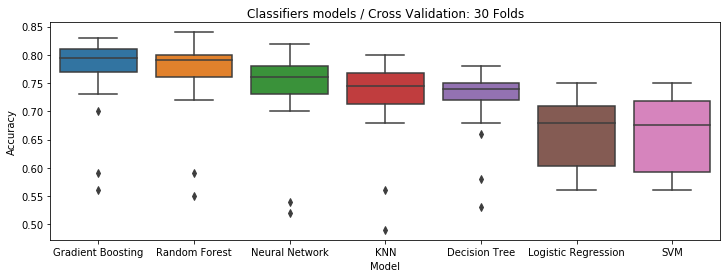

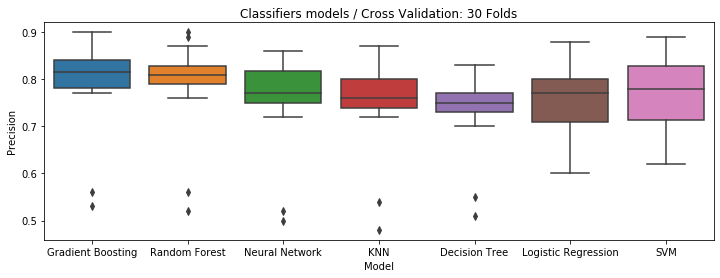

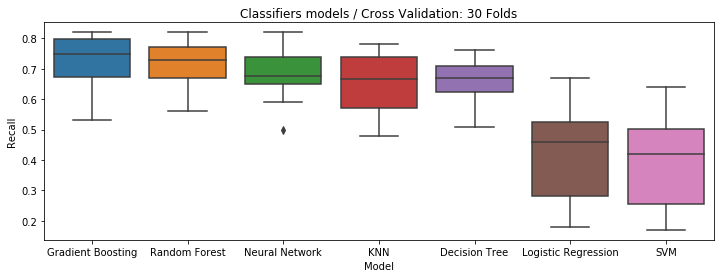

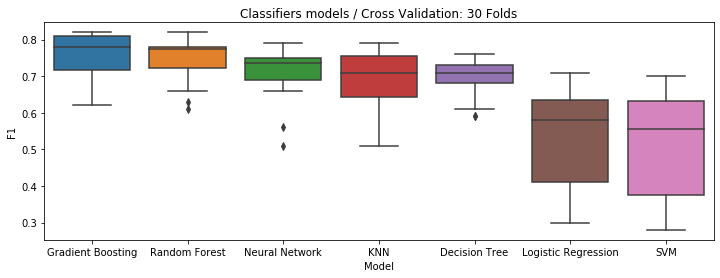

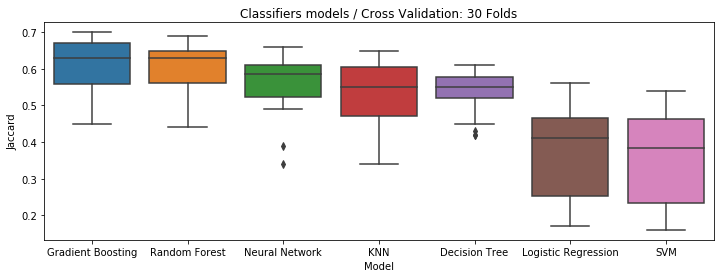

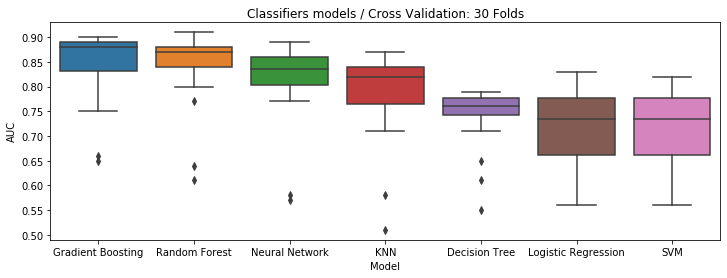

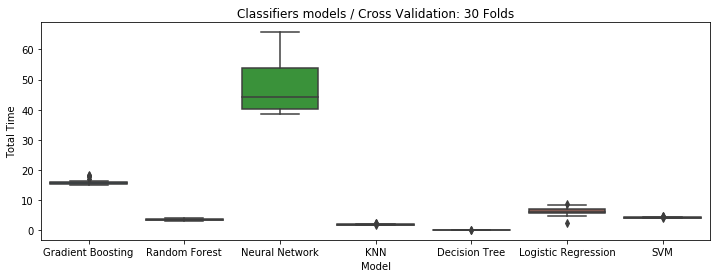

In [40]:
sorted_index=cv_models.groupby('Model')['Accuracy'].mean().sort_values(ascending= False).index

for i in ['Accuracy','Precision','Recall','F1','Jaccard','AUC','Total Time']:
    ax=plt.figure(figsize=(12,4))
    ax=sns.boxplot(cv_models['Model'],cv_models[i],order=sorted_index)
    plt.title('Classifiers models / Cross Validation: '+str(KFold)+' Folds')
    
    my_file=i+' with '+str(KFold)+' Folds.png'
    dir2=os.getcwd()+"/Classification Models/0. Metrics" 
    plt.savefig(os.path.join(dir2, my_file))

In [41]:
#!pip install joblib
import joblib 

In [42]:
# Save the model as a pickle in a file 
joblib.dump(Pipeline(clf['Gradient Boosting']).fit(X,y1), 'Classification_Model.pkl')

['Classification_Model.pkl']